# Zomato dataset

### import required libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Zomato dataset

In [2]:
dataframe = pd.read_csv("Zomato-data-.csv")
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


### Data Clean and preparation

Convert rate as numerical value

In [3]:
def handleRate(value):
    value=str(value).split('/') # split the value to save as a list
    value=value[0];             # overwrite the value to get the "numerator"
    return float(value)         # return the value as a float

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


Get the summary of the dataframe

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Check if there is any null values

In [5]:
print(dataframe.isnull().sum())

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64


### Plot the data - data exploration

Check the data distribution on the type of restaurants.  
Notice the highest is Dining

Text(0.5, 0, 'Type of restaurant')

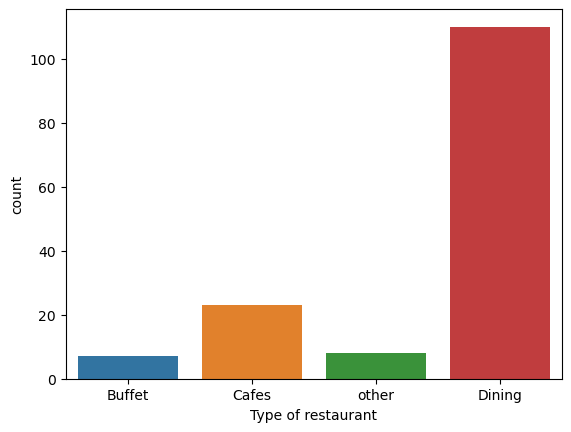

In [6]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of restaurant")

Check the number of votes by type of restaurant.   
Dining category have lots of votes and preferred.  
Notice that 'Other' have more votes compared to Cafes, even if there are more Cafe's compared to restaurants under 'Other' category.

Text(0, 0.5, 'Votes')

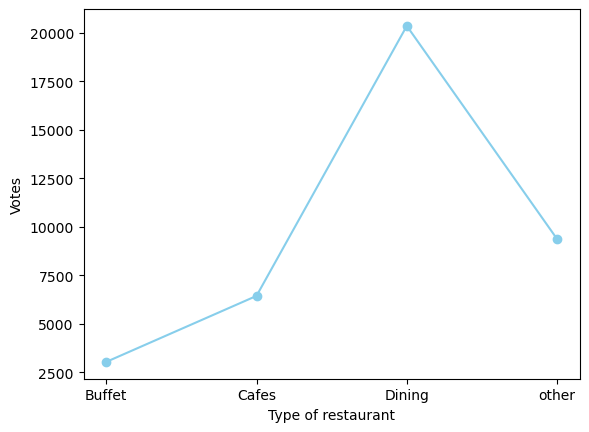

In [7]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='skyblue', marker='o')
plt.xlabel('Type of restaurant')
plt.ylabel('Votes')

Check which restaurant have the most votes.  
Empire restaurant had the most votes

In [8]:
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']

print('Restaurant(s) with the maximum votes:')
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


Check number of restaurants that accepts online order.  
Notice that a lot of restaurants do not accept online orders.

<Axes: xlabel='online_order', ylabel='count'>

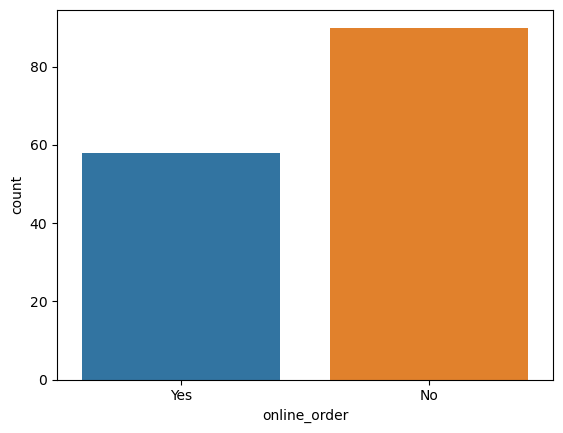

In [9]:
sns.countplot(x=dataframe['online_order'])

Check the distribution of ratings.  
A lot of respondents gave 4 star ratings

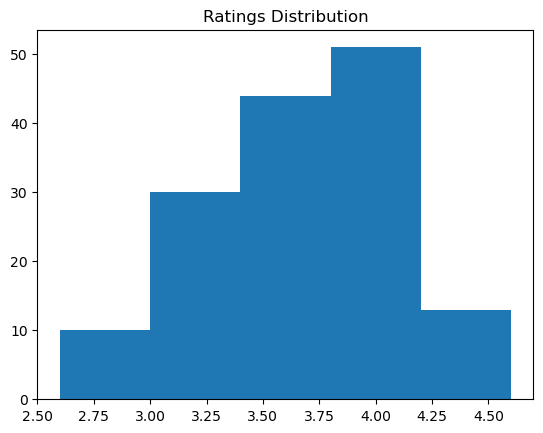

In [10]:
plt.hist(dataframe['rate'],bins=5)
plt.title('Ratings Distribution')
plt.show()

Analyze approximate cost for 2 couple  
Shows respondents prefer 300

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

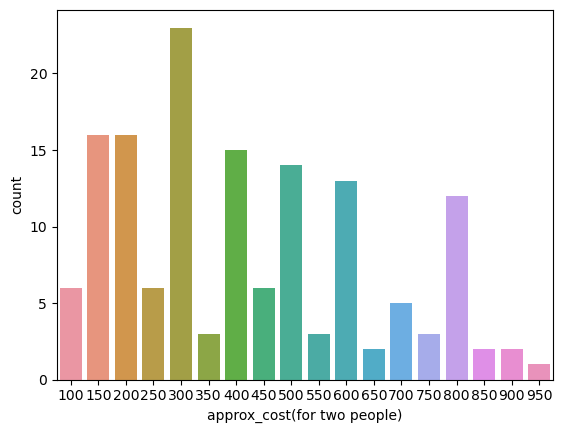

In [11]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

Ratings comparison between restaurants with online orders vs without online orders  
Shows restaurants that has an option for online orders are getting higher ratings

<Axes: xlabel='online_order', ylabel='rate'>

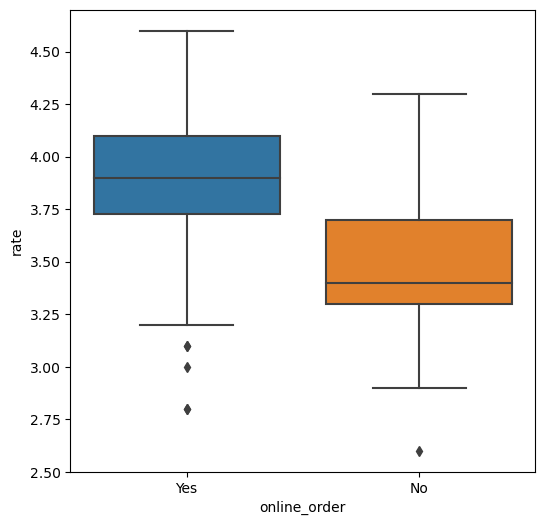

In [12]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)

Mode of order by restaurant type Heat map  
Shows Dining restaurants primarily do not have Online Order option.


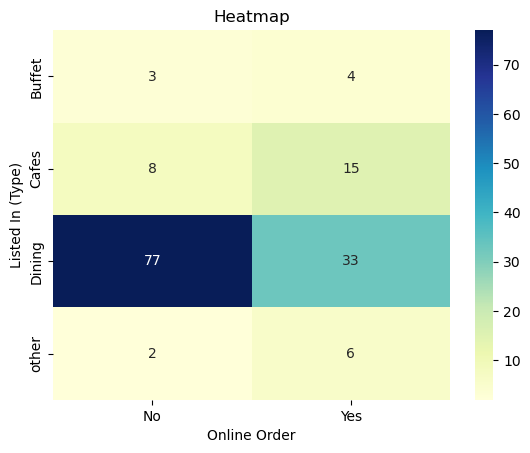

In [13]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()